In [1]:
!python -m spacy download en_core_web_lg
%pip install spacy

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     --------------------------------------- 3.4/587.7 MB 16.8 MB/s eta 0:00:35
      -------------------------------------- 7.9/587.7 MB 19.5 MB/s eta 0:00:30
      ------------------------------------- 10.5/587.7 MB 20.4 MB/s eta 0:00:29
      ------------------------------------- 11.0/587.7 MB 13.0 MB/s eta 0:00:45
     - ------------------------------------ 16.0/587.7 MB 15.0 MB/s eta 0:00:39
     - ------------------------------------ 21.0/587.7 MB 16.4 MB/s eta 0:00:35
     - ------------------------------------ 21.0/587.7 MB 16.4 MB/s eta 0:00:35
     - ------------------------------------ 24.1/587.7 MB 14.1 MB/s eta 0:00:40
     - ------------------------------------ 27.5/587.7 MB 14.3 MB/s eta 0:00:40
     -- ----------------------------------- 31.5/587.7 MB 14.9 MB/s eta 0:00:38
     -- ----------------------------------- 31.5/587.7 MB 14.9 MB/s eta 0:00:38
     -- ----------------------------------- 34.

Importing the functions from the functions.py file

In [2]:
from func import *

nlp = spacy.load('en_core_web_lg')

Loading the data

In [3]:
platform = "1kaggle"
if platform=="kaggle":
    df1 = pd.read_json("/kaggle/input/cgas-assignment1-data/recipe_ingredients.json")
    df2 = pd.read_json("/kaggle/input/cgas-assignment1-data/recipe_ingredients_2ndhalf.json")
    recipe_ingredient_pair = "/kaggle/input/cgas-assignment1-data/results/recipe_ingredient_pairs.txt"
else:
    df1 = pd.read_json("Scraped Data/recipe_ingredients.json")
    df2 = pd.read_json("Scraped Data/recipe_ingredients_2ndhalf.json")
    recipe_ingredient_pair = "recipe_ingredient_pairs.txt"

Since the data has 12k columns instead of rows, we transpose it

In [4]:
df1 = df1.transpose()
df1.reset_index(drop=True, inplace=True)

In [5]:
df2 = df2.transpose()
df2.reset_index(drop=True, inplace=True)

In [6]:
df = pd.concat([df1,df2])
df

,recipe_name,url,recipe_Ingredients,Instructions,cuisine,prep_time
0,Super Easy Slow Cooker Chicken Enchilada Meat,https://www.allrecipes.com/recipe/228367/super...,"[2 cups chicken broth, 1 (14.5 ounce) can dice...","[{'@type': 'HowToStep', 'text': 'Place chicken...",[Mexican Inspired],PT480M
1,Avocado Quick Bread,https://www.allrecipes.com/recipe/27341/avocad...,"[2.6666667461395 cups all-purpose flour, 1.5 t...","[{'@type': 'HowToStep', 'text': 'Preheat the o...",[American],PT60M
2,Quick and Easy Baked Fish Fillet,https://www.allrecipes.com/recipe/256348/quick...,"[1 pound flounder fillets, 0.5 teaspoon salt, ...","[{'@type': 'HowToStep', 'image': [{'@type': 'I...",[American],PT25M
3,Roasted Kohlrabi,https://www.allrecipes.com/recipe/203975/roast...,"[4 kohlrabi bulbs, peeled, 1 tablespoon olive ...","[{'@type': 'HowToStep', 'text': 'Preheat the o...",[American],PT20M
4,Custard Buttercream,https://www.allrecipes.com/recipe/262379/custa...,"[1 egg, 1 cup white sugar, 0.5 cup milk, 1.333...","[{'@type': 'HowToStep', 'text': 'Beat egg with...",[German],PT10M
...,...,...,...,...,...,...
6186,Chocolate Potato Chip Pie,https://www.allrecipes.com/chocolate-potato-ch...,"[Crust:, 1 (16 ounce) bag kettle-cooked potato...","[{'@type': 'HowToStep', 'text': 'Preheat the o...",[American],PT45M
6187,New Orleans Chocolate Bourbon Pecan Pie,https://www.allrecipes.com/recipe/130565/new-o...,"[0.66666668653488 cup white sugar, 1 cup corn ...","[{'@type': 'HowToStep', 'text': 'Preheat the o...",[Southern],PT50M
6188,Microwave Popcorn,https://www.allrecipes.com/recipe/87305/microw...,"[0.5 cup unpopped popcorn, 1 teaspoon vegetabl...","[{'@type': 'HowToStep', 'image': [{'@type': 'I...",[American],PT3M
6189,Grilled Tilapia with Mango Salsa,https://www.allrecipes.com/recipe/166771/grill...,"[0.33333334326744 cup extra-virgin olive oil, ...","[{'@type': 'HowToStep', 'text': 'Prepare the f...",[American],PT10M


# 1a. Preprocessing the data (CSV SAVED) 

In [7]:
df['recipe_id'] = range(1, len(df) + 1)
cols = ['recipe_id'] + [col for col in df.columns if col != 'recipe_id']
df = df[cols]
df = extract_instruction_text(df)
df = extract_prep_time_minutes(df)
df['recipe_Ingredients'] = df['recipe_Ingredients'].apply(list_to_string)
df.to_csv("recipe_dataset")
df

,recipe_id,recipe_name,url,recipe_Ingredients,Instructions,cuisine,Prep Time in Minutes
0,1,Super Easy Slow Cooker Chicken Enchilada Meat,https://www.allrecipes.com/recipe/228367/super...,"2 cups chicken broth, 1 (14.5 ounce) can diced...","Place chicken broth, tomatoes, flour, chili po...",[Mexican Inspired],480
1,2,Avocado Quick Bread,https://www.allrecipes.com/recipe/27341/avocad...,"2.6666667461395 cups all-purpose flour, 1.5 te...",Preheat the oven to 350 degrees F (175 degrees...,[American],60
2,3,Quick and Easy Baked Fish Fillet,https://www.allrecipes.com/recipe/256348/quick...,"1 pound flounder fillets, 0.5 teaspoon salt, g...",Gather all ingredients. Preheat the oven to 40...,[American],25
3,4,Roasted Kohlrabi,https://www.allrecipes.com/recipe/203975/roast...,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o...",Preheat the oven to 450 degrees F (230 degrees...,[American],20
4,5,Custard Buttercream,https://www.allrecipes.com/recipe/262379/custa...,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333...","Beat egg with a fork in a small, heavy saucepa...",[German],10
...,...,...,...,...,...,...,...
6186,12180,Chocolate Potato Chip Pie,https://www.allrecipes.com/chocolate-potato-ch...,"Crust:, 1 (16 ounce) bag kettle-cooked potato ...",Preheat the oven to 350 degrees F (175 degrees...,[American],45
6187,12181,New Orleans Chocolate Bourbon Pecan Pie,https://www.allrecipes.com/recipe/130565/new-o...,"0.66666668653488 cup white sugar, 1 cup corn s...",Preheat the oven to 375 degrees F (190 degrees...,[Southern],50
6188,12182,Microwave Popcorn,https://www.allrecipes.com/recipe/87305/microw...,"0.5 cup unpopped popcorn, 1 teaspoon vegetable...",Gather all ingredients. Mix together unpopped ...,[American],3
6189,12183,Grilled Tilapia with Mango Salsa,https://www.allrecipes.com/recipe/166771/grill...,"0.33333334326744 cup extra-virgin olive oil, 1...","Prepare the fish: Whisk together olive oil, le...",[American],10


Creating a custom tag by POS tagging

In [8]:
matcher = Matcher(nlp.vocab)

ingredient_patterns = [
    [{"POS": "NOUN", "OP": "+"}],  # e.g., "chicken broth", "olive oil"
    [{"POS": "ADJ"}, {"POS": "NOUN", "OP": "+"}],  # e.g., "minced garlic", "boneless chicken breasts"
    [{"POS": "PROPN"}, {"POS": "NOUN", "OP": "+"}],  # e.g., "Dijon mustard"
]

# Add patterns to the matcher
for i, pattern in enumerate(ingredient_patterns):
    matcher.add(f"Ingredient_{i}", [pattern])

# Custom component to identify ingredients
@Language.component("ingredient_component")
def ingredient_component(doc):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label="INGREDIENT") for _, start, end in matches]
    spans += [ent for ent in doc.ents if ent.label_ in ["PRODUCT", "ORG"]]
    spans = spacy.util.filter_spans(spans)
    doc.ents = spans
    return doc

# 1b. Applying NER

In [9]:
nlp.add_pipe("ingredient_component", last=True)

# Function to extract ingredient names from the text
def extract_ingredients(text):
    doc = nlp(text)
    ingredients = []
    
    for ent in doc.ents:
        if ent.label_ == "INGREDIENT":
            ingredient_name = " ".join([token.text for token in ent if token.pos_ in ["NOUN", "PROPN", "ADJ"]])
            ingredients.append(ingredient_name)
    
    return ingredients

# Apply the extract_ingredients function to extract ingredient names
df['ingredient_names'] = df['recipe_Ingredients'].apply(lambda x: extract_ingredients(str(x)))

# 1c. Recipe - Ingredient pair saved

In [10]:
recipe_ingredient_pairs = []

for index, row in df.iterrows():
    recipe_id = row['recipe_id']
    for ingredient in row['ingredient_names']:
        recipe_ingredient_pairs.append((recipe_id, ingredient))

# Save the pairs to a .txt file
with open('recipe_ingredient_pairs.txt', 'w', encoding="utf-8") as file:
    for pair in recipe_ingredient_pairs:
        file.write(f"{pair[0]} - {pair[1]}\n")

print("Saved")

Saved


# 2a. Unique ingredients with their frequenceies saved 

In [11]:
with open(recipe_ingredient_pair, 'r') as f:
    recipe_text = f.read()

ingredient_freq = process_recipes(recipe_text)
print("Ingredient frequencies:", ingredient_freq)

save_to_csv(ingredient_freq, 'ingredient_frequencies.csv')
print("Frequencies saved to ingredient_frequencies.csv")

Ingredient frequencies: {'cups chicken broth': 325, 'ounce': 7409, 'tomatoes': 739, 'cup': 15416, 'purpose flour': 3015, 'cup chili powder': 16, 'teaspoons ground cumin': 115, 'clove garlic': 502, 'teaspoon oregano': 28, 'teaspoon salt': 3245, 'pinch cayenne': 259, 'boneless chicken breast halves': 294, 'cups': 6188, 'teaspoons baking soda': 126, 'teaspoon baking powder': 491, 'teaspoon ground cinnamon': 781, 'teaspoon ground allspice': 106, 'cup butter': 1457, 'white sugar': 3435, 'eggs': 1423, 'ripe avocado': 8, 'cup buttermilk': 128, 'pecans': 205, 'cup raisins': 152, 'tablespoon': 2979, 'pound flounder fillets': 3, 'black pepper': 2843, 'taste': 944, 'tablespoon lemon juice': 163, 'teaspoons': 1797, 'butter': 453, 'teaspoon': 5340, 'onion': 1372, 'tablespoon olive oil': 683, 'salt': 2186, 'pepper': 612, 'Parmesan cheese': 850, 'egg': 738, 'cup milk': 861, 'unsalted butter': 1026, 'room temperature': 453, 'tablespoon rum': 3, 'teaspoon vanilla': 250, 'cups blackberries': 1, 'tablesp

# 2b. 

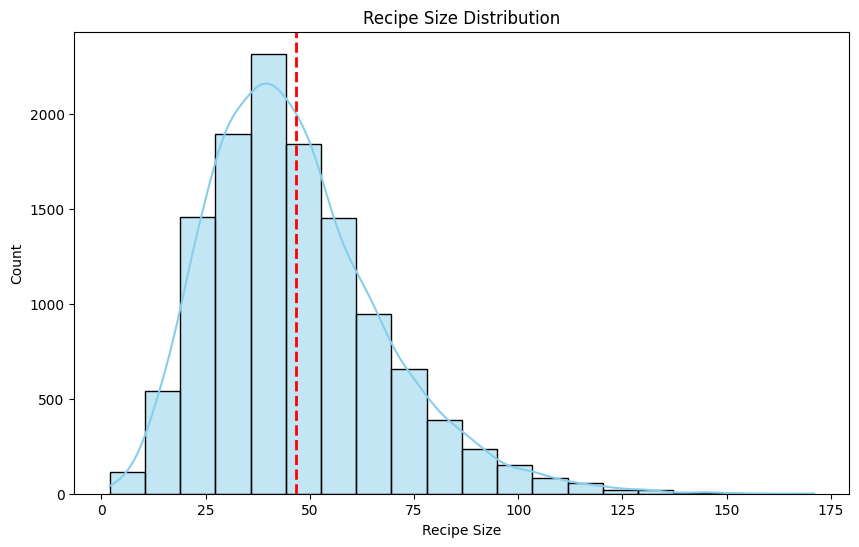

In [14]:
# use df to Plot the recipe size distribution for these recipes and the average size of the recipes (s). 

import matplotlib.pyplot as plt
import seaborn as sns

recipe_sizes = df['recipe_Ingredients'].apply(lambda x: len(x.split()))
average_recipe_size = recipe_sizes.mean()

plt.figure(figsize=(10, 6))
sns.histplot(recipe_sizes, bins=20, color='skyblue', kde=True)
plt.axvline(average_recipe_size, color='red', linestyle='dashed', linewidth=2)

plt.title("Recipe Size Distribution")
plt.xlabel("Recipe Size")

plt.show()


# 2c

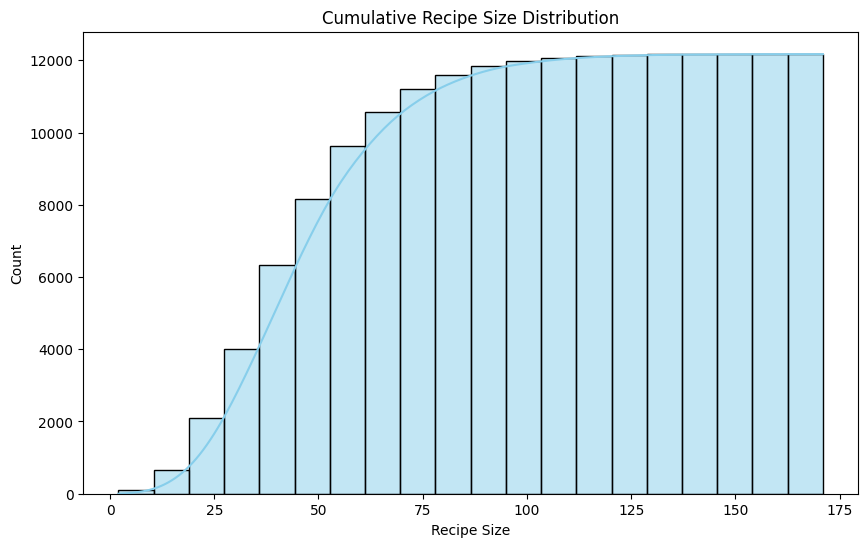

In [15]:
#Plot cumulative distribution of recipe size
plt.figure(figsize=(10, 6))
sns.histplot(recipe_sizes, bins=20, color='skyblue', kde=True, cumulative=True)

plt.title("Cumulative Recipe Size Distribution")
plt.xlabel("Recipe Size")

plt.show()


# 3a

In [19]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and sort the data by frequency
ingredient_freq = pd.read_csv('ingredient_frequencies.csv')
ingredient_freq = ingredient_freq.sort_values(by='Frequency', ascending=False)

# Normalize the frequency
total_frequency = ingredient_freq['Frequency'].sum()
ingredient_freq['Normalized Frequency'] = ingredient_freq['Frequency'] / total_frequency

# Generate the rank column
ingredient_freq['Rank'] = range(1, len(ingredient_freq) + 1)

# Plot the frequency-rank distribution
plt.figure(figsize=(10, 6))
plt.plot(ingredient_freq['Rank'], ingredient_freq['Normalized Frequency'], 'bo', label='Normalized Frequency')

# Use log scales for both axes
plt.yscale('log')
plt.xscale('log')

# Set labels and title
plt.title("Frequency-Rank Distribution of Ingredients")
plt.xlabel("Rank")
plt.ylabel("Normalized Frequency")

plt.legend()
plt.show()


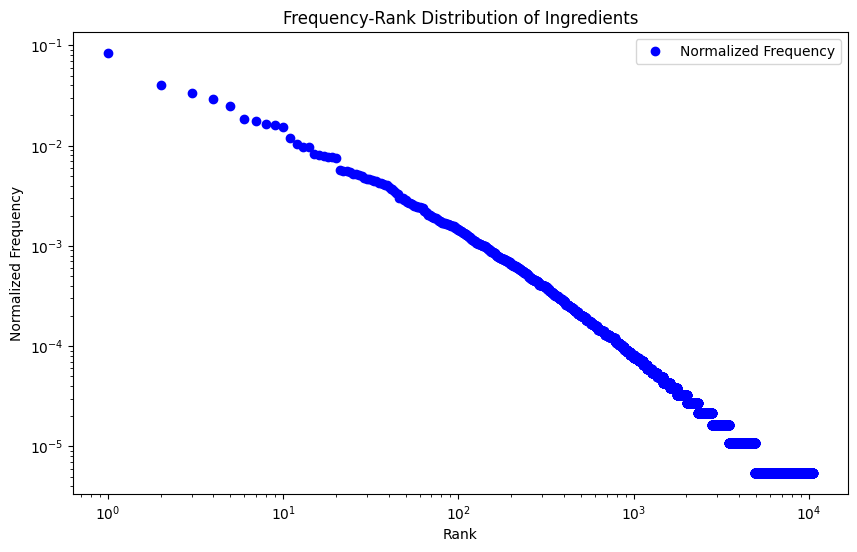

In [24]:
#Plot the frequency-rank distribution. Scale and label axes properly. use log scale for both axes.
ingredient_freq = pd.read_csv('ingredient_frequencies.csv')
ingredient_freq = ingredient_freq.sort_values(by='Frequency', ascending=False)

#normalize the frequency
ingredient_freq['Frequency'] = ingredient_freq['Frequency'] / ingredient_freq['Frequency'].sum()

plt.figure(figsize=(10, 6))
plt.plot(ingredient_freq['Frequency'].values, label='Frequency')

plt.yscale('log')
plt.xscale('log')

plt.title("Frequency-Rank Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")

plt.legend()
plt.show()